In [3716]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
sns.set()

# Load Raw data

In [3717]:
raw_data=pd.read_csv('CarPrice_Assignment.csv')

In [3718]:
raw_data.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [3719]:
#Preprocessing 
#1-remove missing values (which is not found)

In [3720]:
data=raw_data.dropna(axis=0)

In [3721]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [3722]:
#Preprocessing 
#2- removing outliers using quantile to remove top 1% of observations

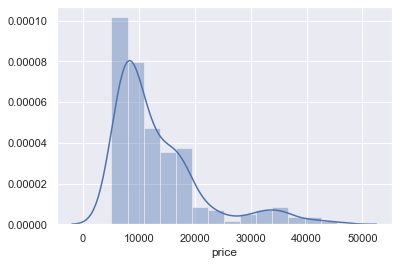

In [3723]:
sns.distplot(data['price'])

remove outliers

In [3724]:
q=data['price'].quantile(0.99)
data=data[data['price']<q]
data.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,202.000000,202.000000,202,202,202,202,202,202,202,202.000000,...,202.000000,202,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
unique,NaN,NaN,144,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corolla,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,182,165,114,94,120,199,NaN,...,NaN,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.707921,0.841584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.557921,...,124.727723,NaN,3.323663,3.253812,10.174356,102.940594,5129.950495,25.376238,30.940594,12841.834985
std,59.382719,1.251727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.774025,...,37.450068,NaN,0.267945,0.315641,3.992875,38.626628,476.049767,6.460521,6.748977,7192.112132
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000
25%,52.250000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7778.250000
50%,104.500000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.900000,...,115.000000,NaN,3.310000,3.280000,9.000000,95.000000,5200.000000,24.500000,30.000000,10221.500000
75%,154.750000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.200000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.500000,16482.500000


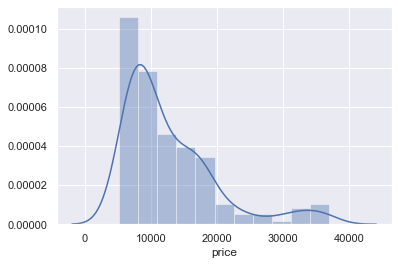

In [3725]:
sns.distplot(data['price'])

In [3726]:
#regression Assumptions
#1-Linearity by log price column to see which features has linear relation to price column. 

In [3727]:
log_price=np.log(data['price'])

In [3728]:
data['log_price']=log_price

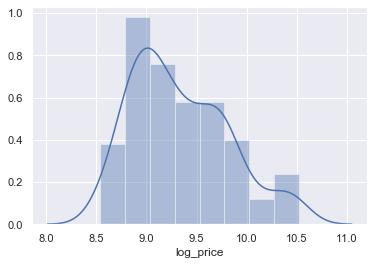

In [3729]:
sns.distplot(data['log_price'])

In [3730]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,log_price
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,103.707921,0.841584,98.557921,173.658416,65.839109,53.701980,2539.089109,124.727723,3.323663,3.253812,10.174356,102.940594,5129.950495,25.376238,30.940594,12841.834985,9.335330
std,59.382719,1.251727,5.774025,11.977926,2.072325,2.449773,505.785849,37.450068,0.267945,0.315641,3.992875,38.626628,476.049767,6.460521,6.748977,7192.112132,0.481523
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000,8.540519
25%,52.250000,0.000000,94.500000,166.300000,64.025000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7778.250000,8.959086
50%,104.500000,1.000000,96.900000,173.100000,65.500000,54.100000,2412.000000,115.000000,3.310000,3.280000,9.000000,95.000000,5200.000000,24.500000,30.000000,10221.500000,9.232246
75%,154.750000,2.000000,101.200000,181.200000,66.500000,55.500000,2918.750000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.500000,16482.500000,9.710053
max,205.000000,3.000000,115.600000,202.600000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,37028.000000,10.519430


preprocess dependent variables

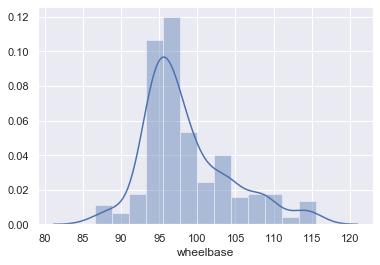

In [3731]:
sns.distplot(data['wheelbase'])


Numerical Features

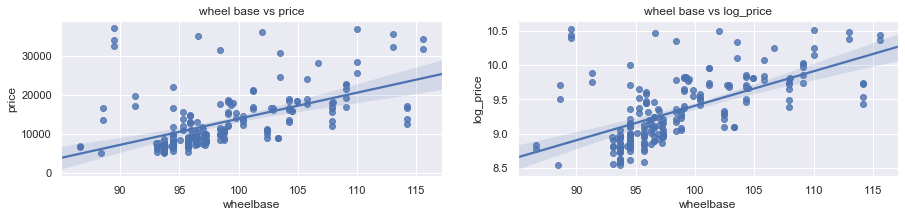

In [3732]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    sns.regplot(data['wheelbase'],data[x])
    plt.title('wheel base vs '+ x)
    plt.ylabel(x)
    plt.xlabel('wheelbase')

plt.figure(figsize=(15,20))
scatter('price',1)
scatter('log_price',2)
plt.show()

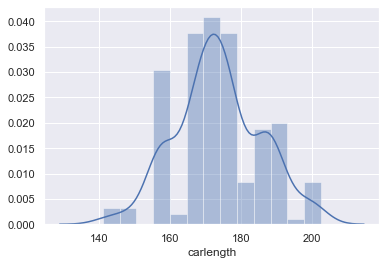

In [3733]:
sns.distplot(data['carlength'])

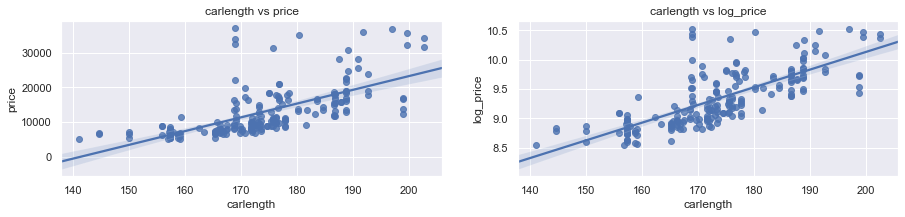

In [3734]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    sns.regplot(data['carlength'],data[x])
    plt.title('carlength vs '+ x)
    plt.ylabel(x)
    plt.xlabel('carlength')

plt.figure(figsize=(15,20))
scatter('price',1)
scatter('log_price',2)
plt.show()

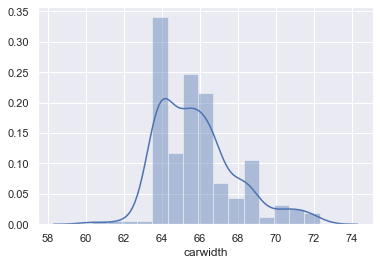

In [3735]:
sns.distplot(data['carwidth'])

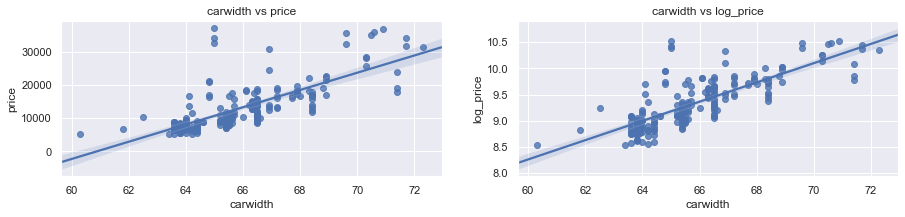

In [3736]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    sns.regplot(data['carwidth'],data[x])
    plt.title('carwidth vs '+ x)
    plt.ylabel(x)
    plt.xlabel('carwidth')

plt.figure(figsize=(15,20))
scatter('price',1)
scatter('log_price',2)
plt.show()

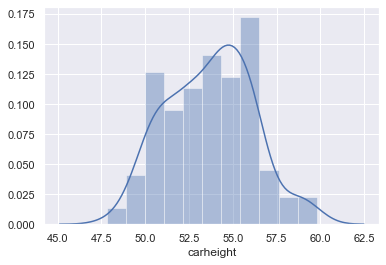

In [3737]:
sns.distplot(data['carheight'])

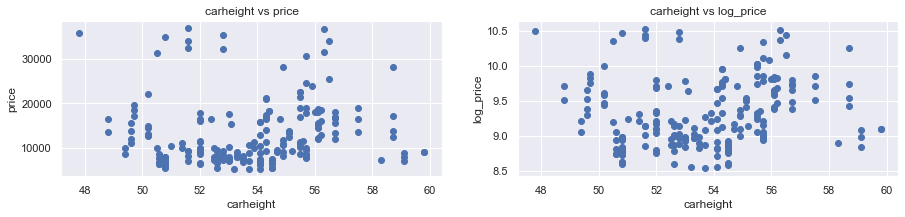

In [3738]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    plt.scatter(data['carheight'],data[x])
    plt.title('carheight vs '+ x)
    plt.ylabel(x)
    plt.xlabel('carheight')

plt.figure(figsize=(15,20))
scatter('price',1)
scatter('log_price',2)
plt.show()

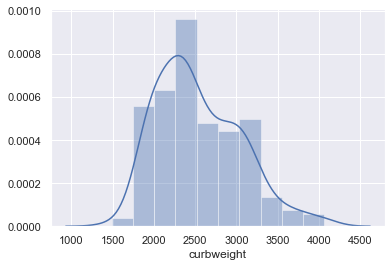

In [3739]:
sns.distplot(data['curbweight'])

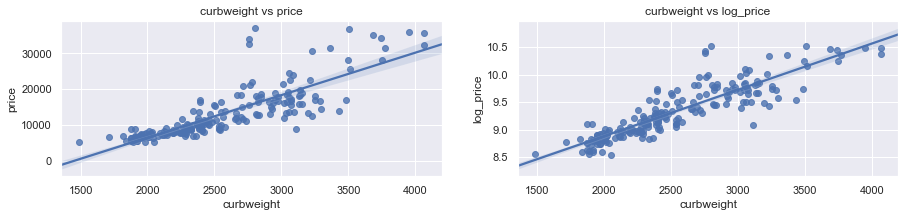

In [3740]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    sns.regplot(data['curbweight'],data[x])
    plt.title('curbweight vs '+ x)
    plt.ylabel(x)
    plt.xlabel('curbweight')

plt.figure(figsize=(15,20))
scatter('price',1)
scatter('log_price',2)
plt.show()

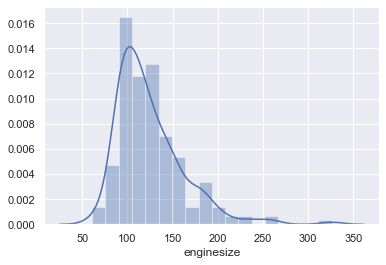

In [3741]:
sns.distplot(data['enginesize'])

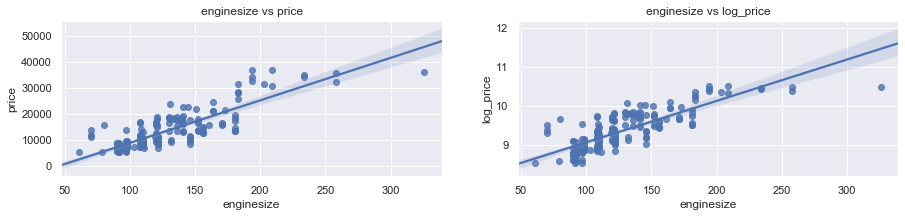

In [3742]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    sns.regplot(data['enginesize'],data[x])
    plt.title('enginesize vs '+ x)
    plt.ylabel(x)
    plt.xlabel('enginesize')

plt.figure(figsize=(15,20))
scatter('price',1)
scatter('log_price',2)
plt.show()

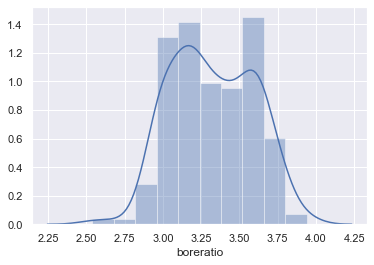

In [3743]:
sns.distplot(data['boreratio'])

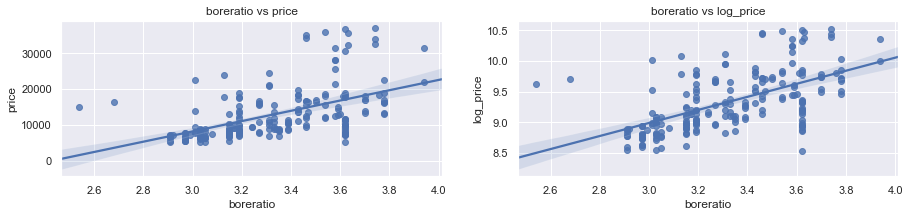

In [3744]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    sns.regplot(data['boreratio'],data[x])
    plt.title('boreratio vs '+ x)
    plt.ylabel(x)
    plt.xlabel('boreratio')

plt.figure(figsize=(15,20))
scatter('price',1)
scatter('log_price',2)
plt.show()

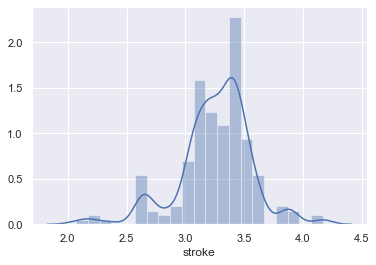

In [3745]:
sns.distplot(data['stroke'])

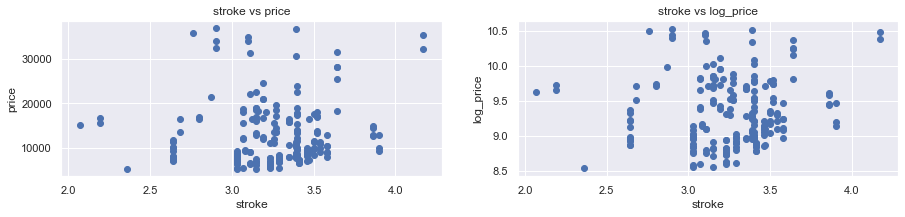

In [3746]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    plt.scatter(data['stroke'],data[x])
    plt.title('stroke vs '+ x)
    plt.ylabel(x)
    plt.xlabel('stroke')

plt.figure(figsize=(15,20))
scatter('price',1)
scatter('log_price',2)
plt.show()

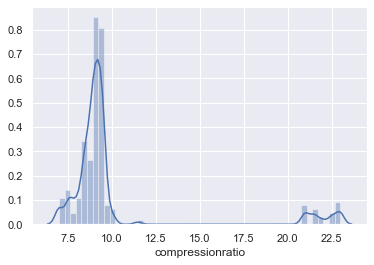

In [3747]:
sns.distplot(data['compressionratio'])

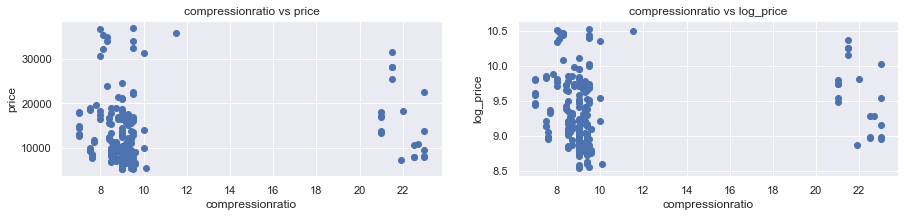

In [3748]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    plt.scatter(data['compressionratio'],data[x])
    plt.title('compressionratio vs '+ x)
    plt.ylabel(x)
    plt.xlabel('compressionratio')

plt.figure(figsize=(15,20))
scatter('price',1)
scatter('log_price',2)
plt.show()

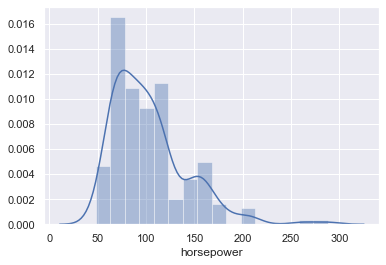

In [3749]:
sns.distplot(data['horsepower'])

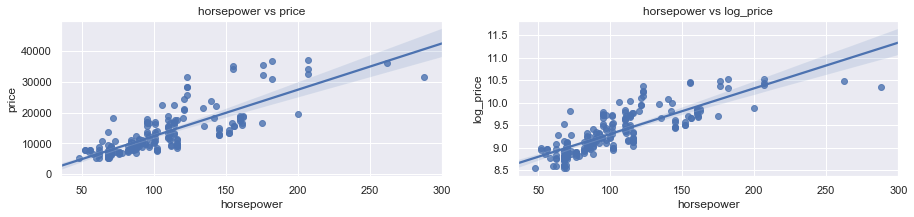

In [3750]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    sns.regplot(data['horsepower'],data[x])
    plt.title('horsepower vs '+ x)
    plt.ylabel(x)
    plt.xlabel('horsepower')

plt.figure(figsize=(15,20))
scatter('price',1)
scatter('log_price',2)
plt.show()

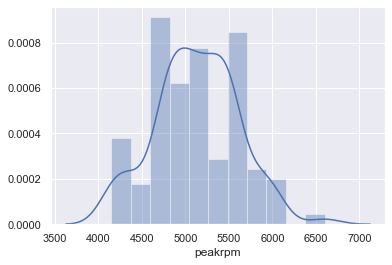

In [3751]:
sns.distplot(data['peakrpm'])

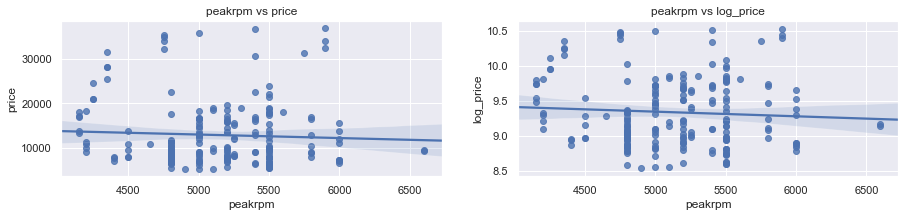

In [3752]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    sns.regplot(data['peakrpm'],data[x])
    plt.title('peakrpm vs '+ x)
    plt.ylabel(x)
    plt.xlabel('peakrpm')

plt.figure(figsize=(15,20))
scatter('price',1)
scatter('log_price',2)
plt.show()

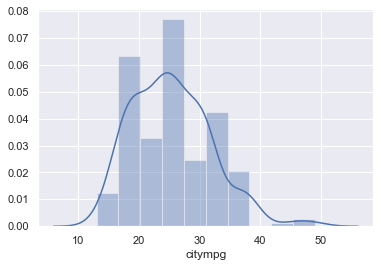

In [3753]:
sns.distplot(data['citympg'])

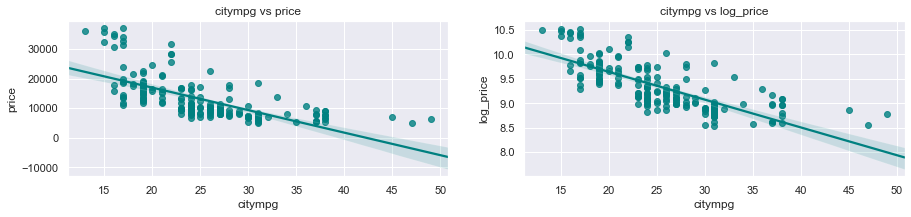

In [3754]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    sns.regplot(data['citympg'],data[x],color='teal')
    plt.title('citympg vs '+ x)
    plt.ylabel(x)
    plt.xlabel('citympg')

plt.figure(figsize=(15,20))
scatter('price',1)
scatter('log_price',2)
plt.show()

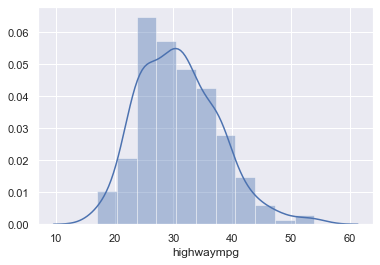

In [3755]:
sns.distplot(data['highwaympg'])

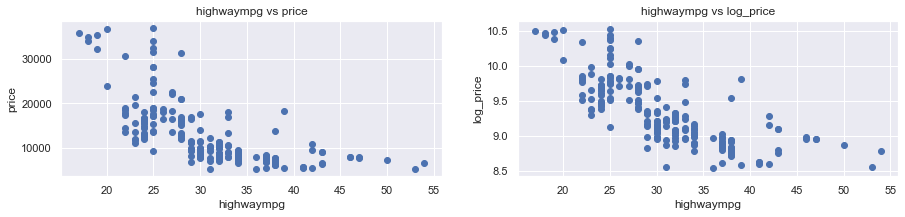

In [3756]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    plt.scatter(data['highwaympg'],data[x])
    plt.title('highwaympg vs '+ x)
    plt.ylabel(x)
    plt.xlabel('highwaympg')

plt.figure(figsize=(15,20))
scatter('price',1)
scatter('log_price',2)
plt.show()

In [3757]:
#Categorial features
#handle dummy variables

In [3758]:
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.CompanyName = data.CompanyName.str.lower()

def replace_name(a,b):
    data.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data.CompanyName.unique()
data.loc[data.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,log_price


In [3759]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,log_price
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,103.707921,0.841584,98.557921,173.658416,65.839109,53.701980,2539.089109,124.727723,3.323663,3.253812,10.174356,102.940594,5129.950495,25.376238,30.940594,12841.834985,9.335330
std,59.382719,1.251727,5.774025,11.977926,2.072325,2.449773,505.785849,37.450068,0.267945,0.315641,3.992875,38.626628,476.049767,6.460521,6.748977,7192.112132,0.481523
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000,8.540519
25%,52.250000,0.000000,94.500000,166.300000,64.025000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7778.250000,8.959086
50%,104.500000,1.000000,96.900000,173.100000,65.500000,54.100000,2412.000000,115.000000,3.310000,3.280000,9.000000,95.000000,5200.000000,24.500000,30.000000,10221.500000,9.232246
75%,154.750000,2.000000,101.200000,181.200000,66.500000,55.500000,2918.750000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.500000,16482.500000,9.710053
max,205.000000,3.000000,115.600000,202.600000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,37028.000000,10.519430


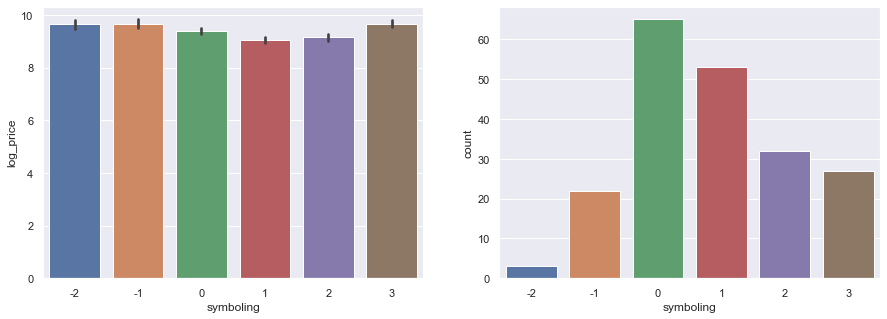

In [3760]:
f, axes = plt.subplots(1, 2,figsize = (15,5))
sns.barplot(  x=data['symboling'], y= data['log_price'] , ax=axes[0])
sns.countplot(  x=data['symboling'],  ax=axes[1])

[Text(0, 0, 'alfa-romero'),
 Text(0, 0, 'audi'),
 Text(0, 0, 'bmw'),
 Text(0, 0, 'chevrolet'),
 Text(0, 0, 'dodge'),
 Text(0, 0, 'honda'),
 Text(0, 0, 'isuzu'),
 Text(0, 0, 'jaguar'),
 Text(0, 0, 'mazda'),
 Text(0, 0, 'buick'),
 Text(0, 0, 'mercury'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'nissan'),
 Text(0, 0, 'peugeot'),
 Text(0, 0, 'plymouth'),
 Text(0, 0, 'porsche'),
 Text(0, 0, 'renault'),
 Text(0, 0, 'saab'),
 Text(0, 0, 'subaru'),
 Text(0, 0, 'toyota'),
 Text(0, 0, 'volkswagen'),
 Text(0, 0, 'volvo')]

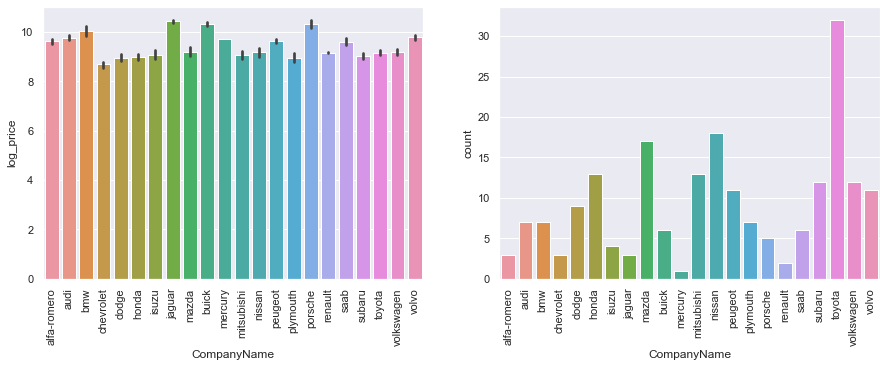

<Figure size 1440x360 with 0 Axes>

In [3761]:
f, axes = plt.subplots(1, 2,figsize = (15,5))
plt.figure(figsize=(20,5))
g=sns.barplot(x=data['CompanyName'], y= data['log_price'] , ax=axes[0])
h=sns.countplot(x=data['CompanyName'],  ax=axes[1])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
h.set_xticklabels(h.get_xticklabels(),rotation=90)

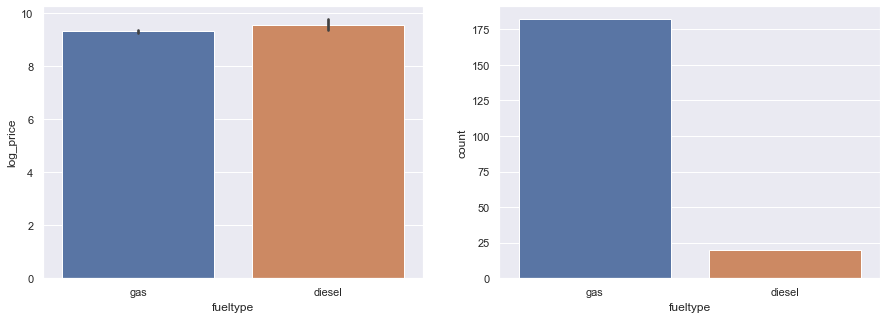

In [3762]:
f, axes = plt.subplots(1, 2,figsize = (15,5))
sns.barplot(  x=data['fueltype'], y= data['log_price'] , ax=axes[0])
sns.countplot(  x=data['fueltype'],  ax=axes[1])

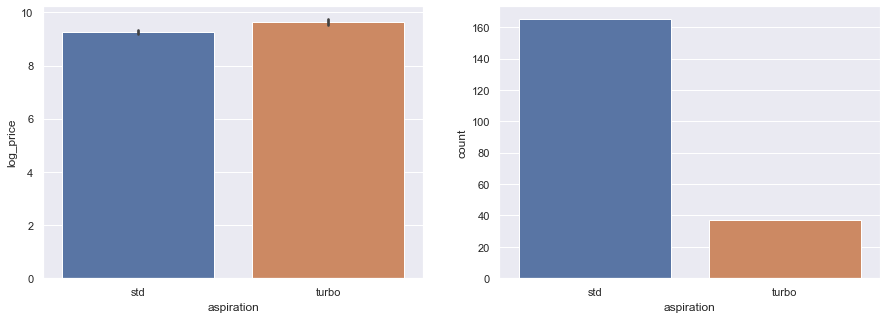

In [3763]:
f, axes = plt.subplots(1, 2,figsize = (15,5))
sns.barplot(  x=data['aspiration'], y= data['log_price'] , ax=axes[0])
sns.countplot(  x=data['aspiration'],  ax=axes[1])

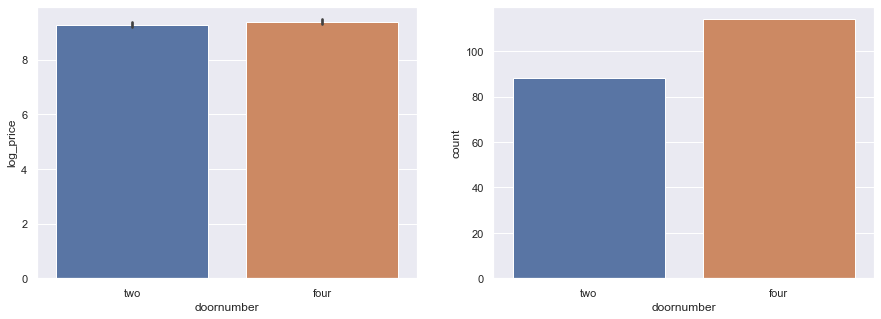

In [3764]:
f, axes = plt.subplots(1, 2,figsize = (15,5))
sns.barplot(  x=data['doornumber'], y= data['log_price'] , ax=axes[0])
sns.countplot(  x=data['doornumber'],  ax=axes[1])

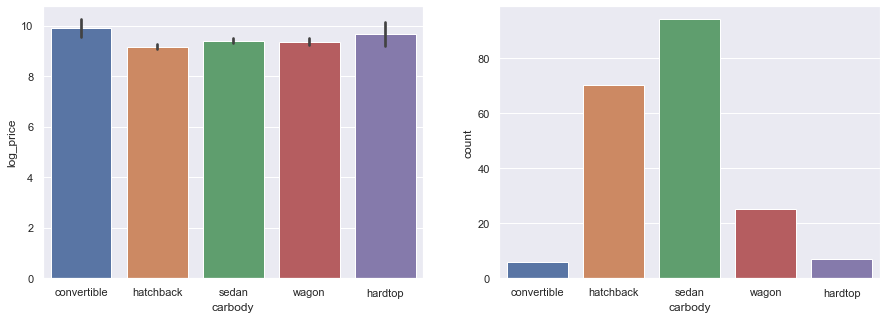

In [3765]:
f, axes = plt.subplots(1, 2,figsize = (15,5))
sns.barplot(  x=data['carbody'], y= data['log_price'] , ax=axes[0])
sns.countplot(  x=data['carbody'],  ax=axes[1])

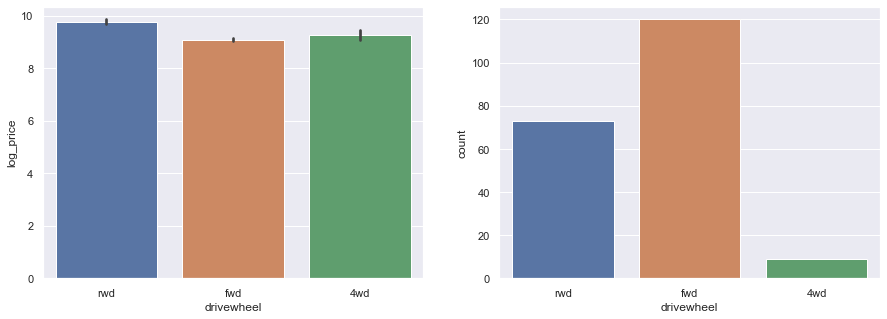

In [3766]:
f, axes = plt.subplots(1, 2,figsize = (15,5))
sns.barplot(  x=data['drivewheel'], y= data['log_price'] , ax=axes[0])
sns.countplot(  x=data['drivewheel'],  ax=axes[1])

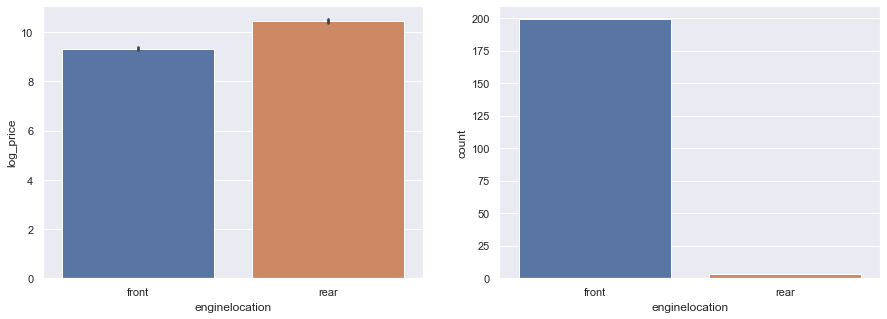

In [3767]:
f, axes = plt.subplots(1, 2,figsize = (15,5))
sns.barplot(  x=data['enginelocation'], y= data['log_price'] , ax=axes[0])
sns.countplot(  x=data['enginelocation'],  ax=axes[1])

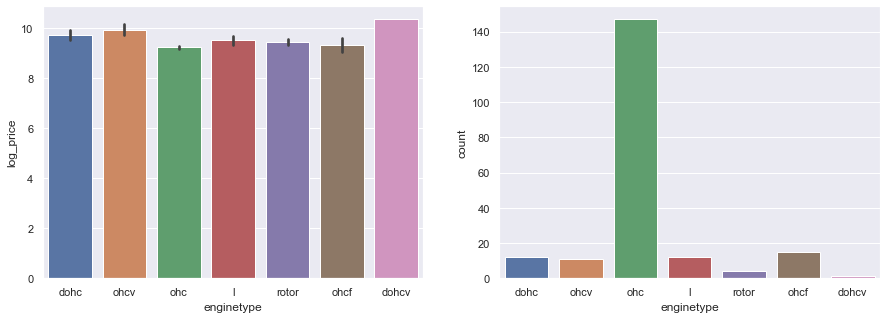

In [3768]:
f, axes = plt.subplots(1, 2,figsize = (15,5))
sns.barplot(  x=data['enginetype'], y= data['log_price'] , ax=axes[0])
sns.countplot(  x=data['enginetype'],  ax=axes[1])

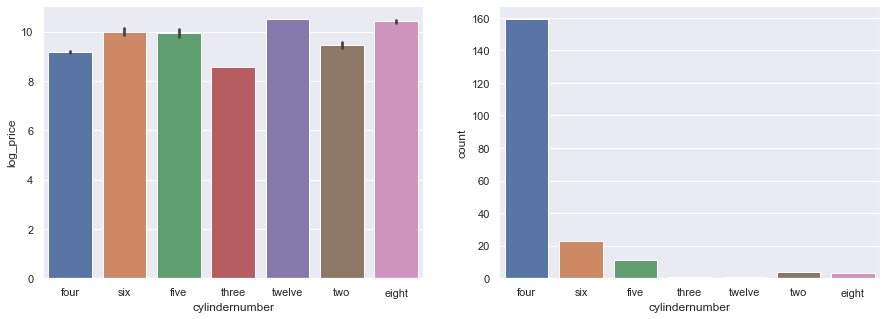

In [3769]:
f, axes = plt.subplots(1, 2,figsize = (15,5))
sns.barplot(  x=data['cylindernumber'], y= data['log_price'] , ax=axes[0])
sns.countplot(  x=data['cylindernumber'],  ax=axes[1])

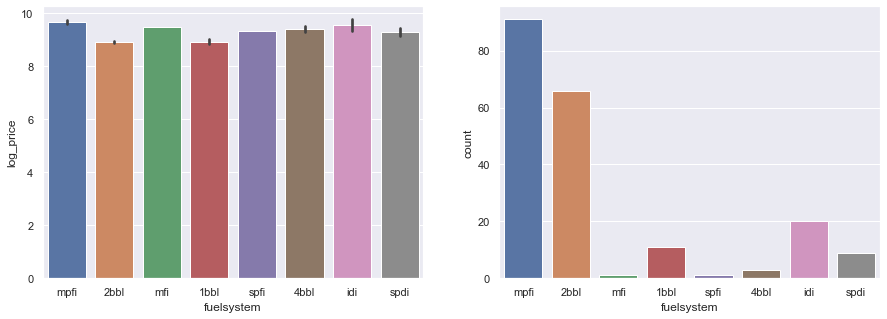

In [3770]:
f, axes = plt.subplots(1, 2,figsize = (15,5))
sns.barplot(  x=data['fuelsystem'], y= data['log_price'] , ax=axes[0])
sns.countplot(  x=data['fuelsystem'],  ax=axes[1])

In [3771]:
#regression Assumptions
#2-No Multicollinearity using vif , features with vif>10 is unacceptable because it means high correlated
#Vif for Numerical features

In [3772]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize', 'boreratio','stroke'
                ,'compressionratio', 'horsepower','peakrpm', 'citympg','highwaympg']]
vif=pd.DataFrame()
variables=sm.add_constant(variables)
vif["VIF"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"]=variables.columns
vif

c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,VIF,features
0,4714.849712,const
1,6.960376,wheelbase
2,8.860449,carlength
3,5.268554,carwidth
4,2.198471,carheight
5,16.677200,curbweight
6,7.141874,enginesize
7,2.029638,boreratio
8,1.205082,stroke
9,2.168931,compressionratio


In [3773]:
# display after dummies variables handling

In [3774]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [3775]:
#define dependent and independent variables for building model

In [3776]:
data.columns.values

array(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'log_price', 'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu',
       'CompanyName_jaguar', 'CompanyName_mazda', 'CompanyName_mercury',
       'CompanyName_mitsubishi', 'CompanyName_nissan',
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota',
       'CompanyName_volkswagen', 'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
       'enginetype_dohcv'

Model1 (AllFeatures included)

In [3777]:
target=data['log_price']
inputs=data[['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu',
       'CompanyName_jaguar', 'CompanyName_mazda', 'CompanyName_mercury',
       'CompanyName_mitsubishi', 'CompanyName_nissan',
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota',
       'CompanyName_volkswagen', 'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']]

Scaling inputs

In [3778]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
input_scaled=scaler.transform(inputs)

Train and Test Split

In [3779]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

# Create Regression

In [3780]:
model1=LinearRegression()
model1.fit(x_train,y_train)
p_values=f_regression(x_train,y_train)[1]
p=pd.DataFrame()
p["p_values"]=list(p_values.round(3))
p["features"]=['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu',
       'CompanyName_jaguar', 'CompanyName_mazda', 'CompanyName_mercury',
       'CompanyName_mitsubishi', 'CompanyName_nissan',
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota',
       'CompanyName_volkswagen', 'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']
p

c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,p_values,features
0,0.213,symboling
1,0.000,wheelbase
2,0.000,carlength
3,0.000,carwidth
4,0.132,carheight
...,...,...
59,0.018,fuelsystem_idi
60,0.733,fuelsystem_mfi
61,0.000,fuelsystem_mpfi
62,0.940,fuelsystem_spdi


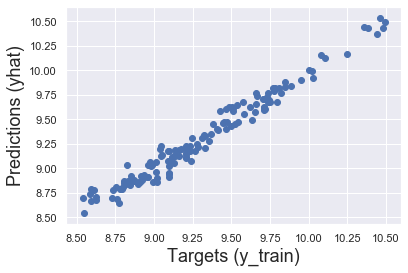

In [3781]:
yhat=model1.predict(x_train)
plt.scatter(y_train,yhat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (yhat)',size=18)
plt.show()

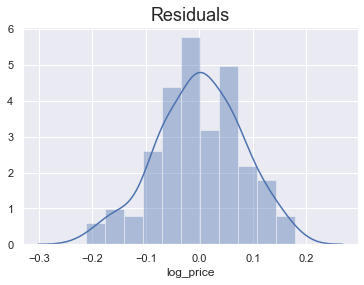

In [3782]:
sns.distplot(y_train - yhat)
plt.title("Residuals", size=18)
plt.show()

In [3783]:
from sklearn.metrics import r2_score 

In [3784]:
m1_r2_train=r2_score(y_train, yhat)
print('model1 r2 score in train:' ,m1_r2_train)

model1 r2 score in train: 0.9691126378432572


In [3785]:
n=x_train.shape[0]
p=x_train.shape[1]
m1_ad_r2_train=1-(1-m1_r2_train)*(n-1)/(n-p-1)

In [3786]:
m1_ad_r2_train

0.943102227606

In [3787]:
model1.intercept_

7.426511486141119

In [3788]:
model1.coef_

array([-2.37147161e-02,  8.58554582e-03, -1.08161066e-02,  2.60809252e-02,
       -2.64066642e-02,  1.00598325e-03,  1.30806621e-03, -3.06563524e-01,
        2.51726285e-02,  2.30538504e-02,  1.07476592e-03,  1.08578611e-04,
       -4.85846676e-03,  6.99280449e-03,  9.31975578e-03,  3.34099149e-01,
       -1.44134337e-01, -3.85502979e-01, -4.55247489e-01, -2.20476141e-01,
       -1.82923595e-01, -5.57439419e-01, -1.17301189e-01, -2.44152771e-01,
       -5.07032474e-01, -1.48332108e-01, -3.54219101e-01, -4.73426284e-01,
        1.09580689e-01, -3.61159467e-01, -1.38626251e-01, -6.51001464e-02,
       -2.82996178e-01, -2.01215759e-01, -2.52417794e-01,  1.03712023e-01,
        8.73854127e-02, -1.23498279e-02, -1.78997322e-01, -1.63976565e-01,
       -1.29475896e-01, -1.74221961e-01, -3.86438386e-02, -4.35836156e-02,
        6.10622664e-16,  6.66133815e-16,  2.26362766e-02,  8.57621109e-02,
       -6.51001464e-02, -2.23634503e-01,  9.74287161e-02, -1.40088786e-01,
        2.58504959e-02, -

In [3789]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=model1.coef_
reg_summary

,Features,Weights
0,symboling,-0.023715
1,wheelbase,0.008586
2,carlength,-0.010816
3,carwidth,0.026081
4,carheight,-0.026407
...,...,...
59,fuelsystem_idi,-0.103712
60,fuelsystem_mfi,0.166468
61,fuelsystem_mpfi,0.170100
62,fuelsystem_spdi,0.181300


# Test

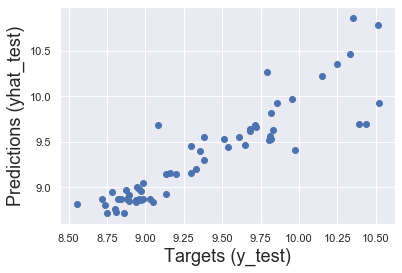

In [3790]:
yhat_test=model1.predict(x_test)
plt.scatter(y_test,yhat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (yhat_test)',size=18)
plt.show()

In [3791]:
m1_r2_test=r2_score(y_test,yhat_test)
print('model1 r2 score in test: ',m1_r2_test)

model1 r2 score in test:  0.8030515328124885


In [3792]:
n_test=x_test.shape[0]
p_test=x_test.shape[1]
m1_ad_r2_test=1-(1-m1_r2_test)*(n_test-1)/(n_test-p_test-1)

In [3793]:
m1_ad_r2_test

3.954227007812672

In [3794]:
df_pf=pd.DataFrame(np.exp(yhat_test),columns=['Predictions'])
df_pf.head()

,Predictions
0,27478.245196
1,13990.936458
2,7486.903407
3,20325.109307
4,7103.210850


In [3795]:
df_pf['Target']=np.exp(y_test)
df_pf.head()

,Predictions,Target
0,27478.245196,NaN
1,13990.936458,NaN
2,7486.903407,16500.0
3,20325.109307,NaN
4,7103.210850,NaN


In [3796]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0    10.148471
1     9.384294
2     9.133243
3    10.519430
4     9.030974
Name: log_price, dtype: float64

In [3797]:
df_pf['Target']=np.exp(y_test)
df_pf

,Predictions,Target
0,27478.245196,25552.0
1,13990.936458,11900.0
2,7486.903407,9258.0
3,20325.109307,37028.0
4,7103.210850,8358.0
...,...,...
56,14265.070370,18280.0
57,6103.526142,6295.0
58,16057.893774,8778.0
59,7003.377837,7609.0


In [3798]:
df_pf['Residual']=df_pf['Target']-df_pf['Predictions']
df_pf['Difference%']=np.absolute(df_pf['Residual']/df_pf['Target']*100).round(5)
df_pf.sort_values("Difference%")

,Predictions,Target,Residual,Difference%
11,18362.486814,18420.000,57.513186,0.31223
30,9406.717186,9495.000,88.282814,0.92978
24,9379.230279,9279.000,-100.230279,1.08018
47,21388.412792,21105.000,-283.412792,1.34287
44,13699.696992,13499.000,-200.696992,1.48675
...,...,...,...,...
52,16258.184569,32528.000,16269.815431,50.01788
7,16258.184569,34028.000,17769.815431,52.22116
31,28745.901325,17859.167,-10886.734325,60.95880
21,52183.841816,31400.500,-20783.341816,66.18793


model2
features: carwidth, carheight, boreratio, stroke, compressionratio, peakrpm, symboling, companyname, doornumber, carbody

In [3799]:
target=data['log_price']
inputs=data[[ 'symboling','carwidth',
       'carheight', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm',  'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu',
       'CompanyName_jaguar', 'CompanyName_mazda', 'CompanyName_mercury',
       'CompanyName_mitsubishi', 'CompanyName_nissan',
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota',
       'CompanyName_volkswagen', 'CompanyName_volvo',
       'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon']]

Scaling inputs

In [3800]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
input_scaled=scaler.transform(inputs)

Train and Test Split

In [3801]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

# Create Regression

In [3802]:
model2=LinearRegression()
model2.fit(x_train,y_train)
p_values=f_regression(x_train,y_train)[1]
p=pd.DataFrame()
p["p_values"]=p_values.round(3)
p["features"]=['symboling', 'carwidth',
       'carheight', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm',  'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu',
       'CompanyName_jaguar', 'CompanyName_mazda', 'CompanyName_mercury',
       'CompanyName_mitsubishi', 'CompanyName_nissan',
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota',
       'CompanyName_volkswagen', 'CompanyName_volvo',
       'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon']
p

,p_values,features
0,0.284,symboling
1,0.000,carwidth
2,0.083,carheight
3,0.000,boreratio
4,0.120,stroke
5,0.406,compressionratio
6,0.212,peakrpm
7,0.057,CompanyName_audi
8,0.000,CompanyName_bmw
9,0.000,CompanyName_buick


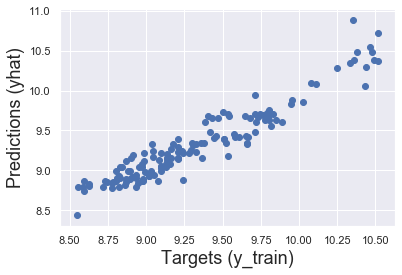

In [3803]:
yhat=model2.predict(x_train)
plt.scatter(y_train,yhat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (yhat)',size=18)
plt.show()

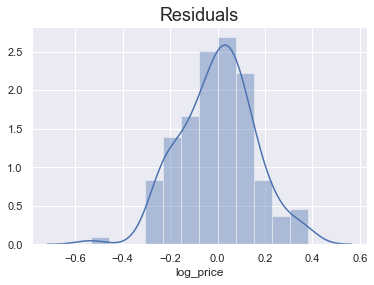

In [3804]:
sns.distplot(y_train - yhat)
plt.title("Residuals", size=18)
plt.show()

In [3805]:
from sklearn.metrics import r2_score 

In [3806]:
m2_r2_train=r2_score(y_train, yhat)
print('model2 r2 score in train: ',m2_r2_train)

model2 r2 score in train:  0.9020359207675752


In [3807]:
n=x_train.shape[0]
p=x_train.shape[1]
m2_ad_r2_train=1-(1-m2_r2_train)*(n-1)/(n-p-1)

In [3808]:
m2_ad_r2_train

0.8718227000697246

In [3809]:
model2.intercept_

2.3687384957529183

In [3810]:
 model2.coef_

array([ 2.14589172e-02,  9.50755898e-02, -2.17539661e-02,  4.45323343e-01,
        1.73300787e-01, -1.57432713e-03,  1.06196370e-04, -2.19892987e-01,
        2.80540100e-01, -2.20178390e-03, -5.86627066e-01, -6.62505353e-01,
       -6.76065866e-01, -4.71090194e-01,  2.60357955e-02, -6.23744722e-01,
       -3.84445349e-01, -7.09073797e-01, -5.29129553e-01, -4.33445791e-01,
       -6.88576798e-01,  1.46289023e-01, -9.80520485e-01, -2.77312135e-01,
       -6.89324150e-01, -5.31110846e-01, -5.11751461e-01, -4.19961795e-01,
       -4.96553336e-02, -3.15151900e-01, -2.60229963e-01, -2.07531422e-01,
       -1.17290586e-01])

In [3811]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=model2.coef_
reg_summary

,Features,Weights
0,symboling,0.021459
1,carwidth,0.095076
2,carheight,-0.021754
3,boreratio,0.445323
4,stroke,0.173301
5,compressionratio,-0.001574
6,peakrpm,0.000106
7,CompanyName_audi,-0.219893
8,CompanyName_bmw,0.280540
9,CompanyName_buick,-0.002202


# Test

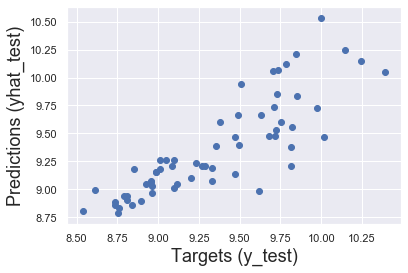

In [3812]:
yhat_test=model2.predict(x_test)
plt.scatter(y_test,yhat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (yhat_test)',size=18)
plt.show()

In [3813]:
m2_r2_test=r2_score(y_test,yhat_test)
print('model2 r2 score in test: ',m2_r2_test)

model2 r2 score in test:  0.704008877556004


In [3814]:
n_test=x_test.shape[0]
p_test=x_test.shape[1]
m2_ad_r2_test=1-(1-m2_r2_test)*(n_test-1)/(n_test-p_test-1)

In [3815]:
m2_ad_r2_test

0.34224195012445346

In [3816]:
df_pf=pd.DataFrame(np.exp(yhat_test),columns=['Predictions'])
df_pf.head()

,Predictions
0,9472.169867
1,14755.911353
2,7948.914553
3,7287.594738
4,8494.589838


In [3817]:
df_pf['Target']=np.exp(y_test)
df_pf.head()

,Predictions,Target
0,9472.169867,13495.0
1,14755.911353,NaN
2,7948.914553,NaN
3,7287.594738,NaN
4,8494.589838,NaN


In [3818]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0    8.987072
1    9.380083
2    9.618469
3    8.894944
4    9.115480
Name: log_price, dtype: float64

In [3819]:
df_pf['Target']=np.exp(y_test)
df_pf

,Predictions,Target
0,9472.169867,7999.0
1,14755.911353,11850.0
2,7948.914553,15040.0
3,7287.594738,7295.0
4,8494.589838,9095.0
...,...,...
56,12989.221171,16558.0
57,9830.888368,11245.0
58,7031.222257,6229.0
59,7606.993659,6575.0


In [3820]:
df_pf['Residual']=df_pf['Target']-df_pf['Predictions']
df_pf['Difference%']=np.absolute(df_pf['Residual']/df_pf['Target']*100).round(5)
df_pf.sort_values("Difference%")

,Predictions,Target,Residual,Difference%
3,7287.594738,7295.0,7.405262,0.10151
25,12980.269757,12964.0,-16.269757,0.12550
24,10247.037235,10198.0,-49.037235,0.48085
60,7846.865043,7799.0,-47.865043,0.61373
35,7047.275697,6918.0,-129.275697,1.86869
...,...,...,...,...
10,9978.684782,18344.0,8365.315218,45.60246
29,8058.342390,5499.0,-2559.342390,46.54196
2,7948.914553,15040.0,7091.085447,47.14817
42,20800.716125,13495.0,-7305.716125,54.13647


model 3 (numerical data)

In [3821]:
target=data['log_price']
inputs=data[[ 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg']]

Scaling inputs

In [3822]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
input_scaled=scaler.transform(inputs)

Train and Test Split

In [3823]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

# Create Regression

In [3824]:
model3=LinearRegression()
model3.fit(x_train,y_train)
p_values=f_regression(x_train,y_train)[1]
p_values.round(3)
p=pd.DataFrame()
p["p_values"]=list(p_values.round(3))
p["features"]=['wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg']
p

,p_values,features
0,0.000,wheelbase
1,0.000,carlength
2,0.000,carwidth
3,0.031,carheight
4,0.000,curbweight
5,0.000,enginesize
6,0.000,boreratio
7,0.030,stroke
8,0.257,compressionratio
9,0.000,horsepower


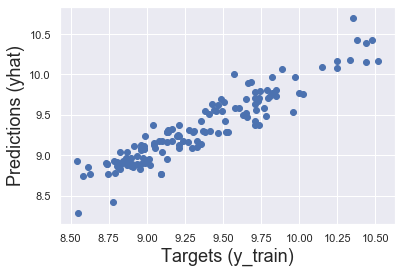

In [3825]:
yhat=model3.predict(x_train)
plt.scatter(y_train,yhat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (yhat)',size=18)
plt.show()

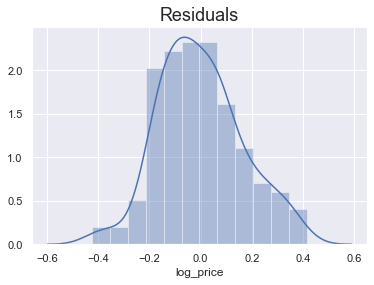

In [3826]:
sns.distplot(y_train - yhat)
plt.title("Residuals", size=18)
plt.show()

In [3827]:
from sklearn.metrics import r2_score 

In [3828]:
m3_r2_train=r2_score(y_train, yhat)
print('model3 r2 score in train',m3_r2_train)

model3 r2 score in train 0.8769403202125368


In [3829]:
n=x_train.shape[0]
p=x_train.shape[1]
m3_ad_r2_train=1-(1-m3_r2_train)*(n-1)/(n-p-1)

In [3830]:
m3_ad_r2_train

0.8643436600768122

In [3831]:
model3.intercept_

6.453686139697581

In [3832]:
 model3.coef_

array([ 8.00455069e-04,  1.43632855e-03,  1.77904927e-02,  2.24573195e-03,
        2.57676668e-04,  3.43777665e-03, -4.80825537e-02, -1.37833858e-01,
        2.15893004e-02,  2.99059081e-03,  1.10993311e-04, -2.13881152e-02,
        7.90336939e-03])

In [3833]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=model3.coef_
reg_summary

,Features,Weights
0,wheelbase,0.000800
1,carlength,0.001436
2,carwidth,0.017790
3,carheight,0.002246
4,curbweight,0.000258
5,enginesize,0.003438
6,boreratio,-0.048083
7,stroke,-0.137834
8,compressionratio,0.021589
9,horsepower,0.002991


# Test

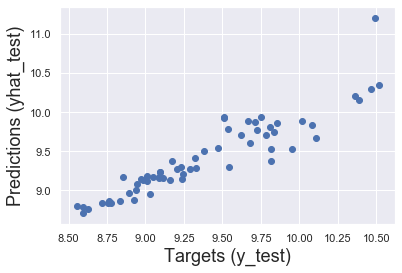

In [3834]:
yhat_test=model3.predict(x_test)
plt.scatter(y_test,yhat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (yhat_test)',size=18)
plt.show()

In [3835]:
m3_r2_test=r2_score(y_test,yhat_test)
print('model3 r2 score in test: ',m3_r2_test)

model3 r2 score in test:  0.844301952029948


In [3836]:
n_test=x_test.shape[0]
p_test=x_test.shape[1]
m3_ad_r2_test=1-(1-m3_r2_test)*(n_test-1)/(n_test-p_test-1)

In [3837]:
m3_ad_r2_test

0.8012365345063166

In [3838]:
df_pf=pd.DataFrame(np.exp(yhat_test),columns=['Predictions'])
df_pf.head()

,Predictions
0,9689.159548
1,8171.299487
2,6362.580048
3,6901.782034
4,31145.387703


In [3839]:
df_pf['Target']=np.exp(y_test)
df_pf.head()

,Predictions,Target
0,9689.159548,NaN
1,8171.299487,NaN
2,6362.580048,NaN
3,6901.782034,13950.0
4,31145.387703,NaN


In [3840]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0     9.010547
1     8.936298
2     8.625509
3     8.754319
4    10.515425
Name: log_price, dtype: float64

In [3841]:
df_pf['Target']=np.exp(y_test)
df_pf

,Predictions,Target
0,9689.159548,8189.0
1,8171.299487,7603.0
2,6362.580048,5572.0
3,6901.782034,6338.0
4,31145.387703,36880.0
...,...,...
56,17491.936891,16695.0
57,8806.273792,7689.0
58,6062.424260,5399.0
59,17131.473232,18620.0


In [3842]:
df_pf['Residual']=df_pf['Target']-df_pf['Predictions']
df_pf['Difference%']=np.absolute(df_pf['Residual']/df_pf['Target']*100).round(5)
df_pf.sort_values("Difference%")

,Predictions,Target,Residual,Difference%
24,18076.375323,18150.0,73.624677,0.40565
30,19169.363541,19045.0,-124.363541,0.65300
60,10658.101766,10795.0,136.898234,1.26816
22,9192.752939,9495.0,302.247061,3.18322
19,7100.616281,6849.0,-251.616281,3.67377
...,...,...,...,...
9,11831.731550,18344.0,6512.268450,35.50081
50,9589.805637,6989.0,-2600.805637,37.21284
40,20299.321532,13499.0,-6800.321532,50.37648
20,20790.723802,13499.0,-7291.723802,54.01677


model 4 (categorial data)

In [3843]:
target=data['log_price']
inputs=data[['symboling', 'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu',
       'CompanyName_jaguar', 'CompanyName_mazda', 'CompanyName_mercury',
       'CompanyName_mitsubishi', 'CompanyName_nissan',
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota',
       'CompanyName_volkswagen', 'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']]

Scaling inputs

In [3844]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
input_scaled=scaler.transform(inputs)

Train and Test Split

In [3845]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

# Create Regression

In [3846]:
model4=LinearRegression()
model4.fit(x_train,y_train)
p_values=f_regression(x_train,y_train)[1]
p_values.round(3)
p=pd.DataFrame()
p["p_values"]=list(p_values.round(3))
p["features"]=['symboling', 'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu',
       'CompanyName_jaguar', 'CompanyName_mazda', 'CompanyName_mercury',
       'CompanyName_mitsubishi', 'CompanyName_nissan',
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota',
       'CompanyName_volkswagen', 'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']
p

c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,p_values,features
0,0.351,symboling
1,0.080,CompanyName_audi
2,0.002,CompanyName_bmw
3,0.000,CompanyName_buick
4,0.104,CompanyName_chevrolet
5,0.032,CompanyName_dodge
6,0.036,CompanyName_honda
7,0.263,CompanyName_isuzu
8,0.000,CompanyName_jaguar
9,0.704,CompanyName_mazda


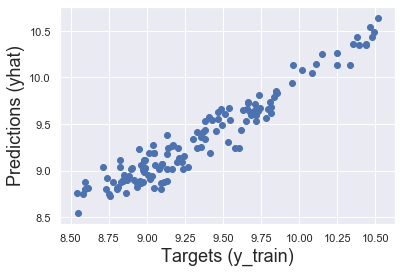

In [3847]:
yhat=model4.predict(x_train)
plt.scatter(y_train,yhat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (yhat)',size=18)
plt.show()

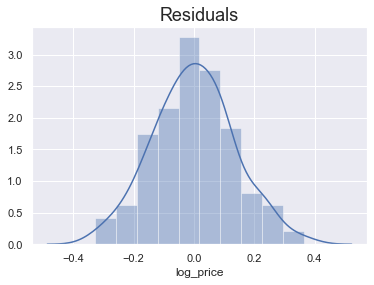

In [3848]:
sns.distplot(y_train - yhat)
plt.title("Residuals", size=18)
plt.show()

In [3849]:
from sklearn.metrics import r2_score 

In [3850]:
m4_r2_train=r2_score(y_train, yhat)
print('model4 r2 score in train: ',m4_r2_train)

model4 r2 score in train:  0.9269827420894361


In [3851]:
n=x_train.shape[0]
p=x_train.shape[1]
m4_ad_r2_train=1-(1-m4_r2_train)*(n-1)/(n-p-1)

In [3852]:
m4_ad_r2_train

0.8851413920507983

In [3853]:
model4.intercept_

9.600273191715532

In [3854]:
 model4.coef_

array([ 0.00362621,  0.43791894,  0.41195932,  0.40956766, -0.23176699,
       -0.03689352,  0.45478251, -0.09858525,  0.68312708,  0.28160802,
        0.25090893,  0.04270886,  0.11052967,  0.17136545, -0.08289584,
        0.47581057,  0.13652787,  0.47165174, -0.09774407, -0.01653815,
        0.08415528,  0.23646827, -0.23015608,  0.19703423, -0.20070883,
       -0.2896624 , -0.31892112, -0.37426006, -0.36570244, -0.12575457,
        0.18258298,  0.16591483,  0.30989574, -0.06040154, -0.02106725,
        0.06817076,  0.24152157, -0.09991329,  0.02847337, -0.28445123,
        0.03624084, -0.23176699,  0.05671794, -0.09991329,  0.33889665,
        0.21441934,  0.23015608,  0.        ,  0.53217643,  0.5719885 ,
        0.        ])

In [3855]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=model4.coef_
reg_summary

,Features,Weights
0,symboling,0.003626
1,CompanyName_audi,0.437919
2,CompanyName_bmw,0.411959
3,CompanyName_buick,0.409568
4,CompanyName_chevrolet,-0.231767
5,CompanyName_dodge,-0.036894
6,CompanyName_honda,0.454783
7,CompanyName_isuzu,-0.098585
8,CompanyName_jaguar,0.683127
9,CompanyName_mazda,0.281608


# Test

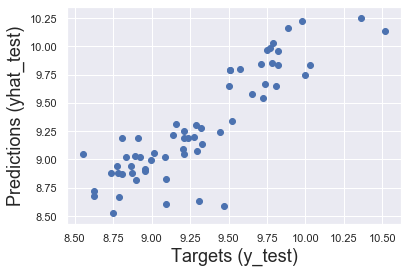

In [3856]:
yhat_test=model4.predict(x_test)
plt.scatter(y_test,yhat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (yhat_test)',size=18)
plt.show()

In [3857]:
m4_r2_test=r2_score(y_test,yhat_test)
print('model4 r2 score in test: ',m4_r2_test)

model4 r2 score in test:  0.728458777467551


In [3858]:
n_test=x_test.shape[0]
p_test=x_test.shape[1]
m4_ad_r2_test=1-(1-m4_r2_test)*(n_test-1)/(n_test-p_test-1)

In [3859]:
m4_ad_r2_test

-0.8102748168829932

In [3860]:
df_pf=pd.DataFrame(np.exp(yhat_test),columns=['Predictions'])
df_pf.head()

,Predictions
0,6747.502377
1,7295.219788
2,18981.691410
3,5835.490837
4,8548.716009


In [3861]:
df_pf['Target']=np.exp(y_test)
df_pf.head()

,Predictions,Target
0,6747.502377,NaN
1,7295.219788,NaN
2,18981.691410,16500.0
3,5835.490837,NaN
4,8548.716009,17450.0


In [3862]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0    8.895493
1    8.958669
2    9.781885
3    8.791030
4    9.016513
Name: log_price, dtype: float64

In [3863]:
df_pf['Target']=np.exp(y_test)
df_pf

,Predictions,Target
0,6747.502377,7299.0
1,7295.219788,7775.0
2,18981.691410,17710.0
3,5835.490837,6575.0
4,8548.716009,8238.0
...,...,...
56,9786.066666,7395.0
57,10319.848164,12629.0
58,7169.726815,7129.0
59,11009.393888,10795.0


In [3864]:
df_pf['Residual']=df_pf['Target']-df_pf['Predictions']
df_pf['Difference%']=np.absolute(df_pf['Residual']/df_pf['Target']*100).round(5)
df_pf.sort_values("Difference%")

,Predictions,Target,Residual,Difference%
14,8088.490741,8058.0,-30.490741,0.37839
58,7169.726815,7129.0,-40.726815,0.57128
15,18608.022073,18420.0,-188.022073,1.02075
59,11009.393888,10795.0,-214.393888,1.98605
36,9780.717512,9995.0,214.282488,2.14390
...,...,...,...,...
17,5474.262146,8916.5,3442.237854,38.60526
33,9786.066666,6695.0,-3091.066666,46.16978
45,5631.993964,11048.0,5416.006036,49.02250
12,5378.869248,12964.0,7585.130752,58.50919


model 5 
features : 'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','CompanyName_audi',        'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche',  'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo',  'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
        'enginetype_ohc',
       'enginetype_ohcv', 
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
      'cylindernumber_twelve',
        'fuelsystem_2bbl', 
       'fuelsystem_idi',  'fuelsystem_mpfi'

In [3865]:
target=data['log_price']
inputs=data[['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche',  'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo',  'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
        'enginetype_ohc',
       'enginetype_ohcv', 
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
      'cylindernumber_twelve',
        'fuelsystem_2bbl', 
       'fuelsystem_idi',  'fuelsystem_mpfi']]

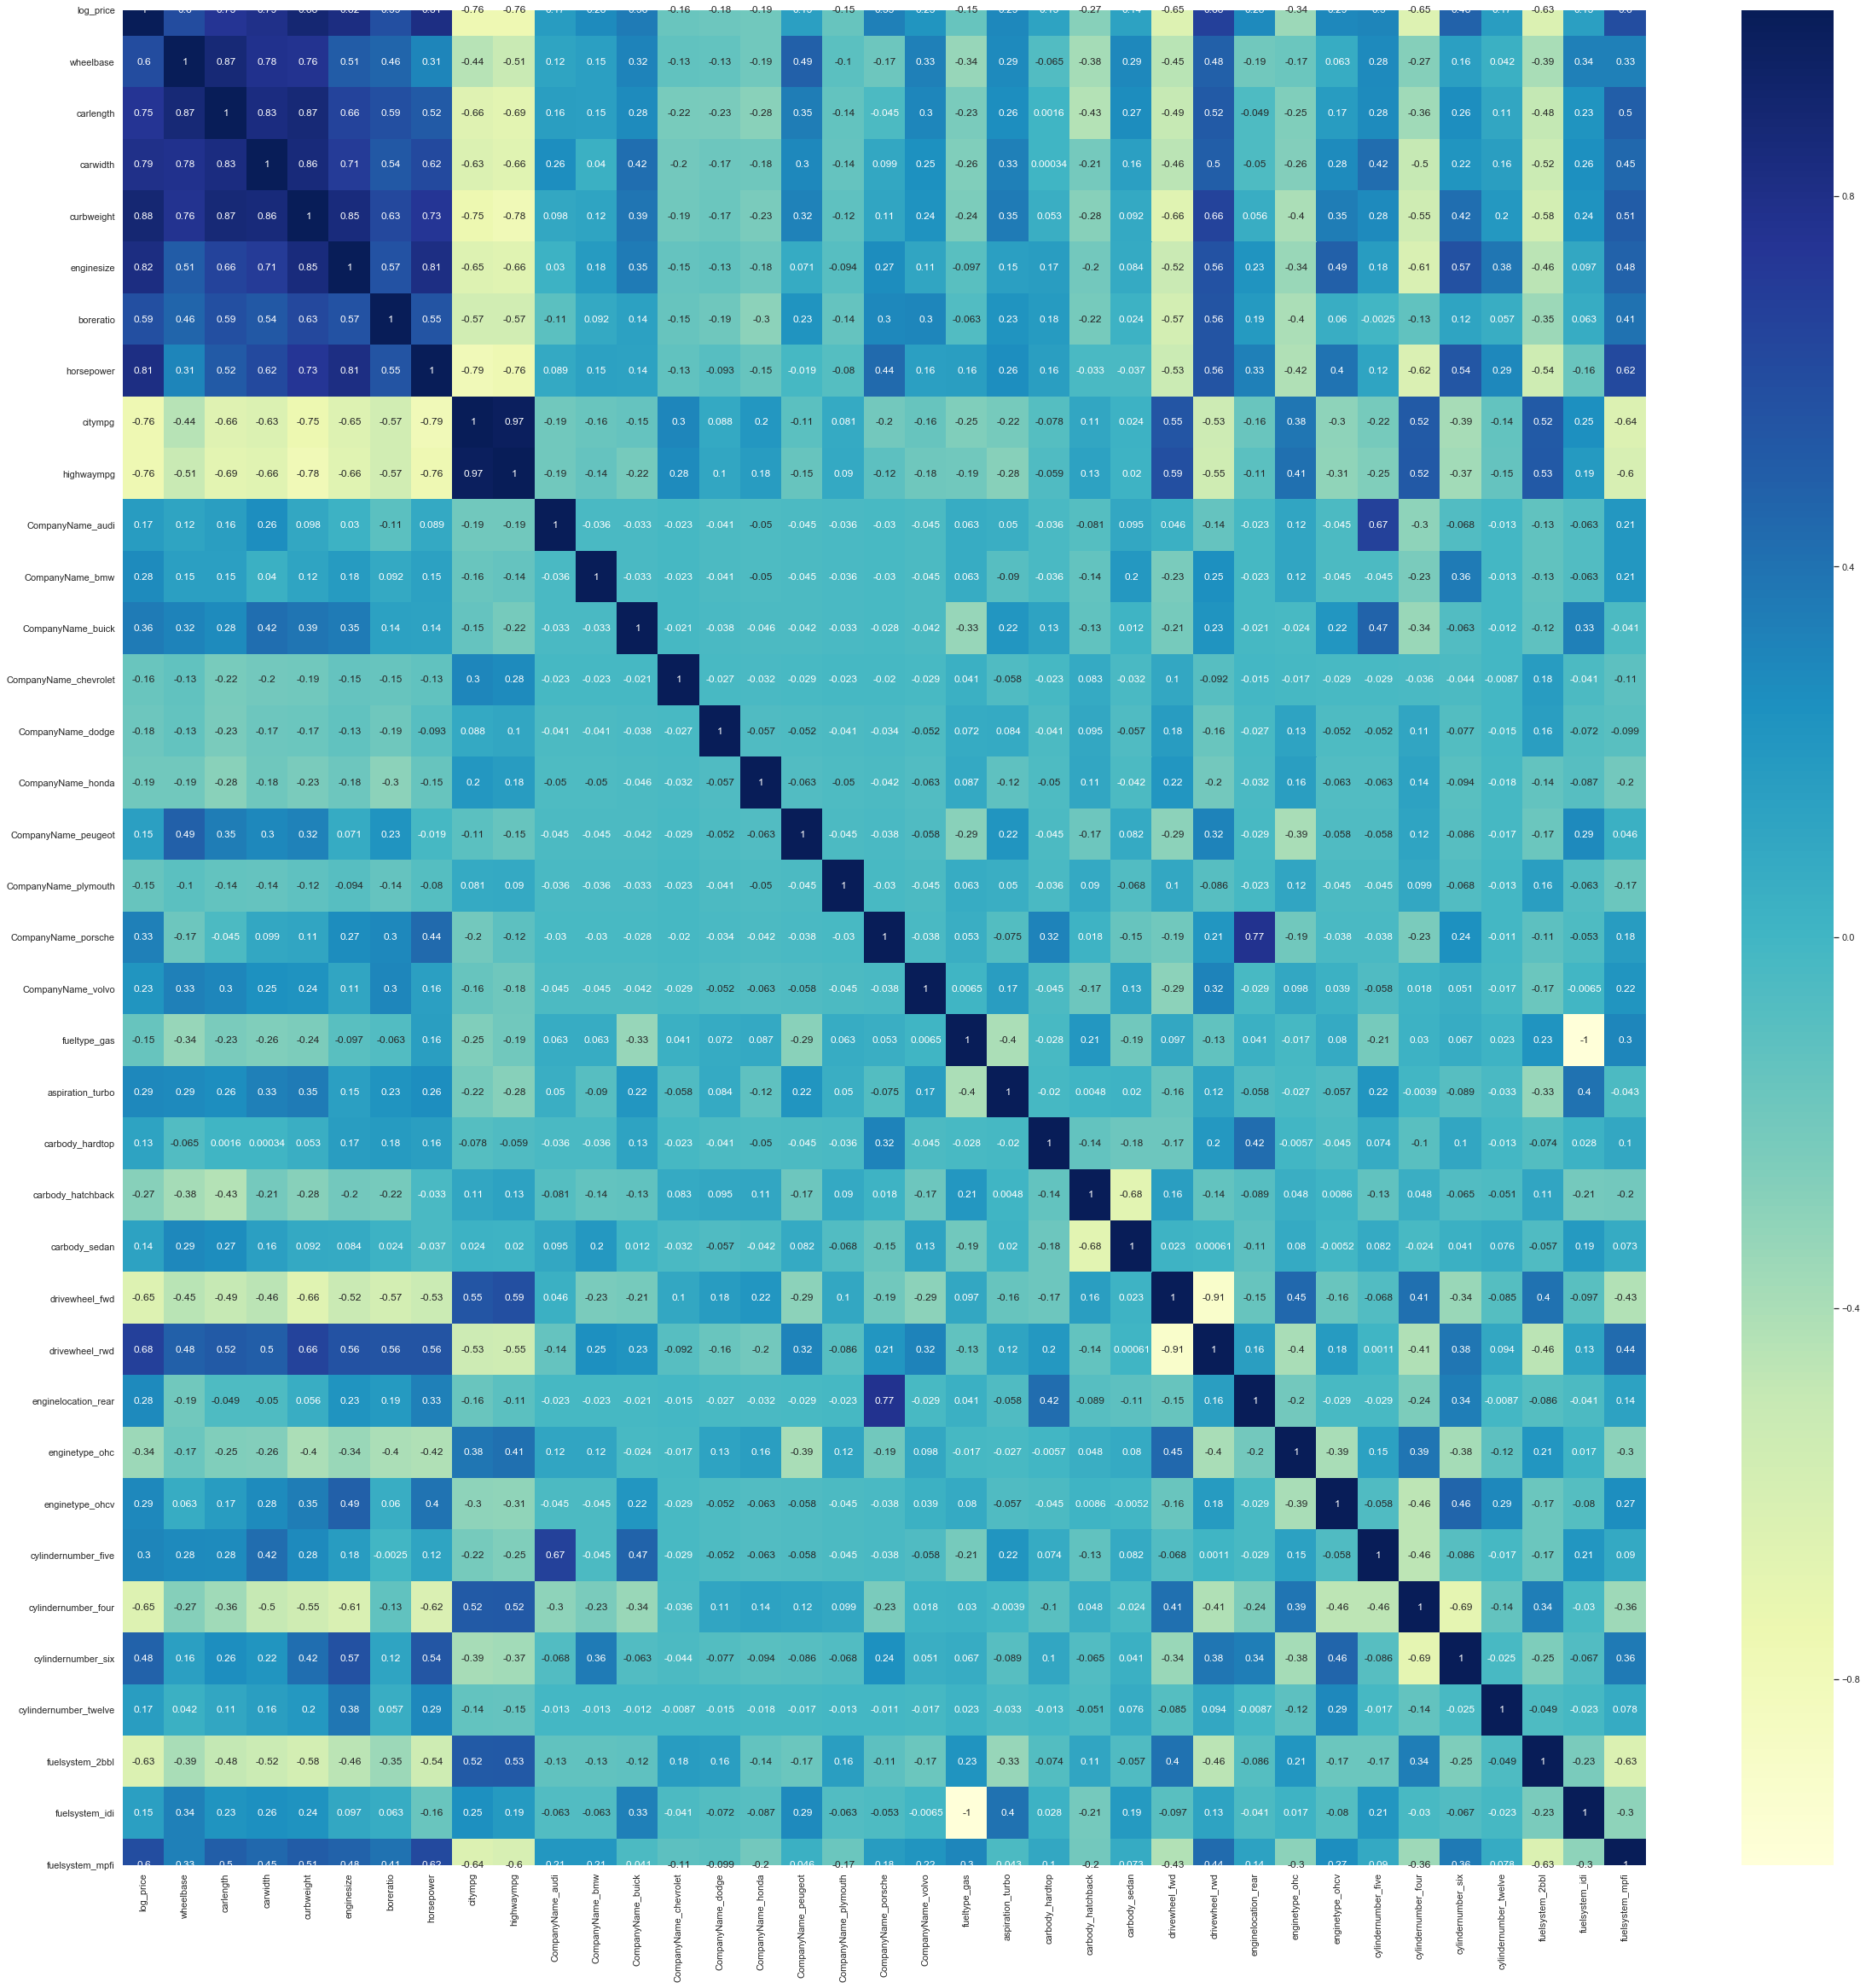

In [3866]:
#Correlation using heatmap
model5_data=data[['log_price','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche',  'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo',  'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
        'enginetype_ohc',
       'enginetype_ohcv', 
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
      'cylindernumber_twelve',
        'fuelsystem_2bbl', 
       'fuelsystem_idi',  'fuelsystem_mpfi']]
plt.figure(figsize = (40, 40))
sns.heatmap(model5_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

Scaling inputs

In [3867]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
input_scaled=scaler.transform(inputs)

Train and Test Split

In [3868]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

# Create Regression

In [3869]:
model5=LinearRegression()
model5.fit(x_train,y_train)
p_values=f_regression(x_train,y_train)[1]
p_values.round(3)
p=pd.DataFrame()
p["p_values"]=list(p_values.round(3))
p["features"]=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche',  'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo',  'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
        'enginetype_ohc',
       'enginetype_ohcv', 
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
      'cylindernumber_twelve',
        'fuelsystem_2bbl', 
       'fuelsystem_idi',  'fuelsystem_mpfi']
p

c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,p_values,features
0,0.000,wheelbase
1,0.000,carlength
2,0.000,carwidth
3,0.000,curbweight
4,0.000,enginesize
5,0.000,boreratio
6,0.000,horsepower
7,0.000,citympg
8,0.000,highwaympg
9,0.078,CompanyName_audi


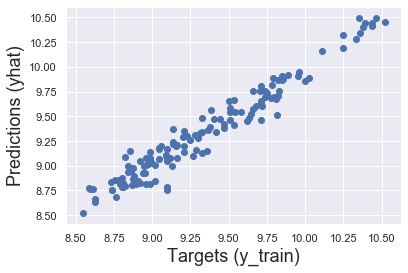

In [3870]:
yhat=model5.predict(x_train)
plt.scatter(y_train,yhat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (yhat)',size=18)
plt.show()

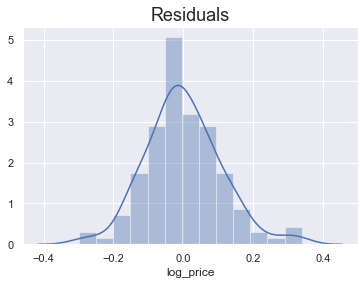

In [3871]:
sns.distplot(y_train - yhat)
plt.title("Residuals", size=18)
plt.show()

In [3872]:
from sklearn.metrics import r2_score 

In [3873]:
m5_r2_train=r2_score(y_train, yhat)
print('model5 r2 score in train: ',m5_r2_train)

model5 r2 score in train:  0.9500549339540936


In [3874]:
n=x_train.shape[0]
p=x_train.shape[1]
m5_ad_r2_train=1-(1-m5_r2_train)*(n-1)/(n-p-1)

In [3875]:
m5_ad_r2_train

0.9327662572458952

In [3876]:
model5.intercept_

6.424924436736699

In [3877]:
 model5.coef_

array([-6.03373993e-03, -4.37323959e-03,  3.60843555e-02,  7.56348324e-04,
       -9.38537817e-04, -2.75165112e-02,  1.78181502e-04, -1.33706235e-02,
        8.88730727e-03,  3.18634540e-01,  4.77990608e-01,  2.25050722e-01,
        4.44875794e-02, -7.66718770e-02,  1.22391242e-01, -2.69717847e-01,
       -7.56342945e-02,  1.55581628e-01, -3.31667909e-02, -5.78019323e-02,
        1.11258178e-01,  2.60377453e-02, -1.20393199e-02,  4.12608393e-02,
        1.58025786e-01,  2.25478605e-01,  6.91664332e-01, -3.83198833e-02,
       -1.34888214e-01, -2.37725141e-01, -5.01803694e-02, -1.11163982e-01,
        1.11022302e-16,  1.00192526e-01,  5.78019323e-02,  1.92843608e-01])

In [3878]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=model5.coef_
reg_summary

,Features,Weights
0,wheelbase,-6.033740e-03
1,carlength,-4.373240e-03
2,carwidth,3.608436e-02
3,curbweight,7.563483e-04
4,enginesize,-9.385378e-04
5,boreratio,-2.751651e-02
6,horsepower,1.781815e-04
7,citympg,-1.337062e-02
8,highwaympg,8.887307e-03
9,CompanyName_audi,3.186345e-01


# Test

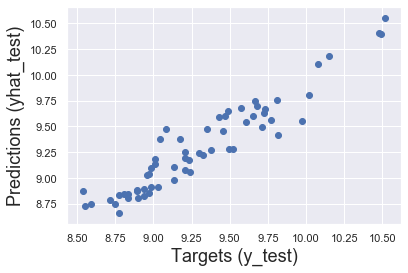

In [3879]:
yhat_test=model5.predict(x_test)
plt.scatter(y_test,yhat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (yhat_test)',size=18)
plt.show()

In [3880]:
m5_r2_test=r2_score(y_test,yhat_test)
print('model5 r2 score in test: ',m5_r2_test)

model5 r2 score in test:  0.8953506710522614


In [3881]:
n_test=x_test.shape[0]
p_test=x_test.shape[1]
m5_ad_r2_test=1-(1-m5_r2_test)*(n_test-1)/(n_test-p_test-1)

In [3882]:
m5_ad_r2_test

0.7383766776306535

In [3883]:
df_pf=pd.DataFrame(np.exp(yhat_test),columns=['Predictions'])
df_pf.head()

,Predictions
0,7196.058752
1,9611.900852
2,17176.371877
3,14804.604453
4,8731.229468


In [3884]:
df_pf['Target']=np.exp(y_test)
df_pf.head()

,Predictions,Target
0,7196.058752,NaN
1,9611.900852,NaN
2,17176.371877,16500.0
3,14804.604453,NaN
4,8731.229468,17450.0


In [3885]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0    8.894944
1    9.234545
2    9.664596
3    9.468079
4    9.208338
Name: log_price, dtype: float64

In [3886]:
df_pf['Target']=np.exp(y_test)
df_pf

,Predictions,Target
0,7196.058752,7295.0
1,9611.900852,10245.0
2,17176.371877,15750.0
3,14804.604453,12940.0
4,8731.229468,9980.0
...,...,...
56,7145.832550,7295.0
57,12775.450538,12764.0
58,10709.408813,13645.0
59,6286.248699,5399.0


In [3887]:
df_pf['Residual']=df_pf['Target']-df_pf['Predictions']
df_pf['Difference%']=np.absolute(df_pf['Residual']/df_pf['Target']*100).round(5)
df_pf.sort_values("Difference%")

,Predictions,Target,Residual,Difference%
50,6300.434696,6295.0,-5.434696,0.08633
57,12775.450538,12764.0,-11.450538,0.08971
11,6932.994948,6855.0,-77.994948,1.13778
0,7196.058752,7295.0,98.941248,1.35629
29,9811.293613,9988.0,176.706387,1.76919
...,...,...,...,...
8,12268.922394,18344.0,6075.077606,33.11752
12,14109.564341,21485.0,7375.435659,34.32830
41,11810.129398,8449.0,-3361.129398,39.78139
45,7164.982696,5118.0,-2046.982696,39.99575


model 6 
features : 'boreratio','horsepower','citympg','highwaympg','CompanyName_audi',        'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche',  'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo',  'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
        'enginetype_ohc',
       'enginetype_ohcv', 
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
      'cylindernumber_twelve',
        'fuelsystem_2bbl', 
       'fuelsystem_idi',  'fuelsystem_mpfi'

In [3888]:
target=data['log_price']
inputs=data[['boreratio','horsepower','citympg','highwaympg','CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche',  'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo',  'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
        'enginetype_ohc',
       'enginetype_ohcv', 
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
      'cylindernumber_twelve',
        'fuelsystem_2bbl', 
       'fuelsystem_idi',  'fuelsystem_mpfi']]

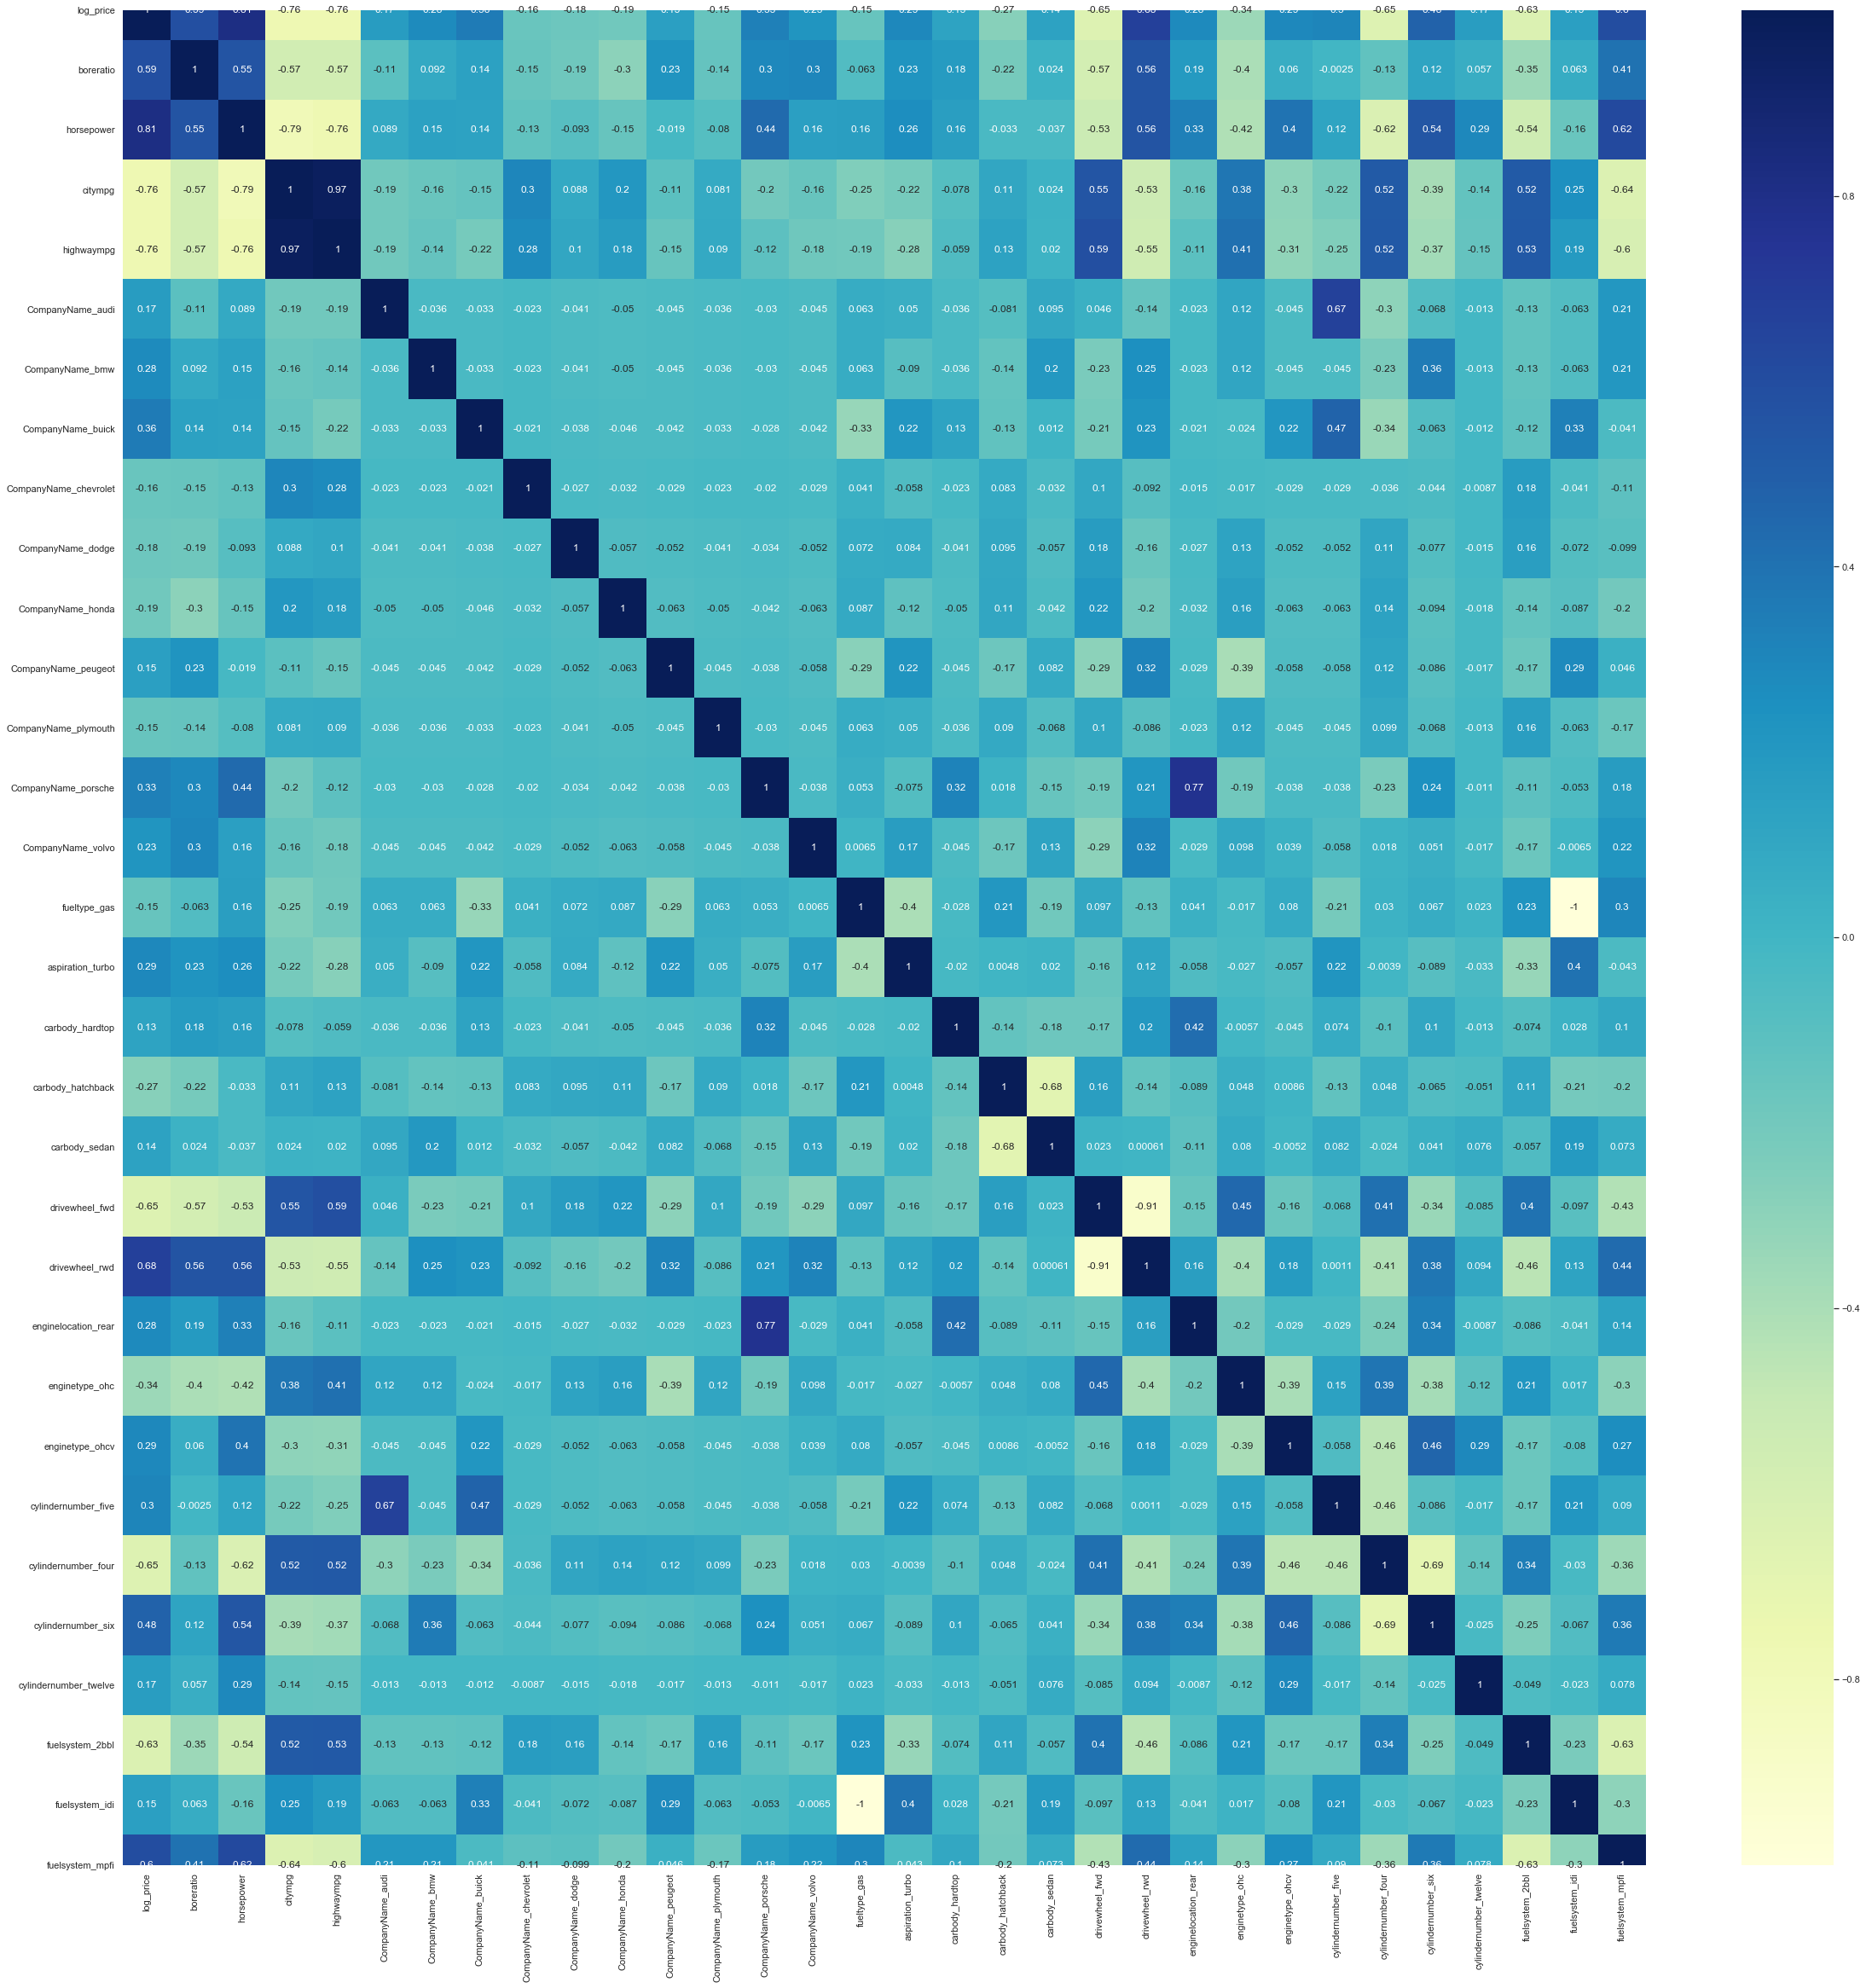

In [3889]:
#Correlation using heatmap
model6_data=data[['log_price','boreratio','horsepower','citympg','highwaympg','CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche',  'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo',  'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
        'enginetype_ohc',
       'enginetype_ohcv', 
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
      'cylindernumber_twelve',
        'fuelsystem_2bbl', 
       'fuelsystem_idi',  'fuelsystem_mpfi']]
plt.figure(figsize = (40, 40))
sns.heatmap(model6_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

Scaling inputs

In [3890]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
input_scaled=scaler.transform(inputs)

Train and Test Split

In [3891]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

# Create Regression

In [3892]:
model6=LinearRegression()
model6.fit(x_train,y_train)
p_values=f_regression(x_train,y_train)[1]
p_values.round(3)
p=pd.DataFrame()
p["p_values"]=list(p_values.round(3))
p["features"]=['boreratio','horsepower','citympg','highwaympg','CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 
       'CompanyName_peugeot', 'CompanyName_plymouth',
       'CompanyName_porsche',  'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo',  'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
        'enginetype_ohc',
       'enginetype_ohcv', 
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
      'cylindernumber_twelve',
        'fuelsystem_2bbl', 
       'fuelsystem_idi',  'fuelsystem_mpfi']
p

,p_values,features
0,0.000,boreratio
1,0.000,horsepower
2,0.000,citympg
3,0.000,highwaympg
4,0.020,CompanyName_audi
5,0.002,CompanyName_bmw
6,0.000,CompanyName_buick
7,0.036,CompanyName_chevrolet
8,0.015,CompanyName_dodge
9,0.011,CompanyName_honda


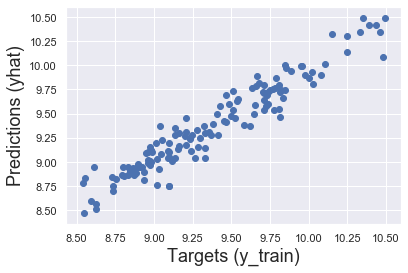

In [3893]:
yhat=model6.predict(x_train)
plt.scatter(y_train,yhat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (yhat)',size=18)
plt.show()

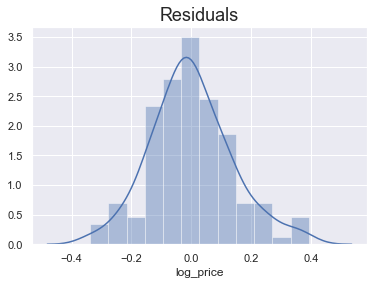

In [3894]:
sns.distplot(y_train - yhat)
plt.title("Residuals", size=18)
plt.show()

In [3895]:
from sklearn.metrics import r2_score 

In [3896]:
m6_r2_train=r2_score(y_train, yhat)
print('model6 r2 score in train: ',m6_r2_train)

model6 r2 score in train:  0.9187228366814661


In [3897]:
n=x_train.shape[0]
p=x_train.shape[1]
m6_ad_r2_train=1-(1-m6_r2_train)*(n-1)/(n-p-1)

In [3898]:
m6_ad_r2_train

0.8956073131688556

In [3899]:
model6.intercept_

9.604689401875273

In [3900]:
 model6.coef_

array([ 0.01770541,  0.00349496, -0.03363836,  0.00591502,  0.27713573,
        0.1894627 ,  0.50893412,  0.11177334, -0.14106484,  0.05514359,
        0.04354799, -0.09171627,  0.16232036,  0.11420931, -0.21030754,
       -0.0012675 , -0.17310984, -0.08703615,  0.01864638,  0.04226571,
        0.17461027,  0.27697512,  0.06593003, -0.07800737, -0.15788661,
       -0.10496565,  0.0392786 ,  0.16778682,  0.06120152,  0.21030754,
        0.17224358])

In [3901]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=model6.coef_
reg_summary

,Features,Weights
0,boreratio,0.017705
1,horsepower,0.003495
2,citympg,-0.033638
3,highwaympg,0.005915
4,CompanyName_audi,0.277136
5,CompanyName_bmw,0.189463
6,CompanyName_buick,0.508934
7,CompanyName_chevrolet,0.111773
8,CompanyName_dodge,-0.141065
9,CompanyName_honda,0.055144


# Test

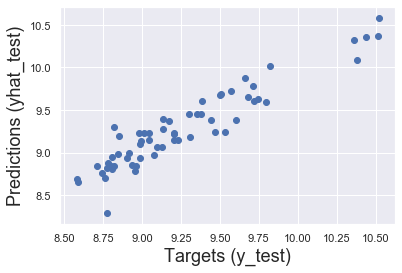

In [3902]:
yhat_test=model6.predict(x_test)
plt.scatter(y_test,yhat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (yhat_test)',size=18)
plt.show()

In [3903]:
m6_r2_test=r2_score(y_test,yhat_test)
print('model6 r2 score in test: ',m6_r2_test)

model6 r2 score in test:  0.8755012609760054


In [3904]:
n_test=x_test.shape[0]
p_test=x_test.shape[1]
m6_ad_r2_test=1-(1-m6_r2_test)*(n_test-1)/(n_test-p_test-1)

In [3905]:
m6_ad_r2_test

0.7424164020193216

In [3906]:
df_pf=pd.DataFrame(np.exp(yhat_test),columns=['Predictions'])
df_pf.head()

,Predictions
0,6492.061659
1,5977.809037
2,6932.675707
3,8608.445950
4,10738.255056


In [3907]:
df_pf['Target']=np.exp(y_test)
df_pf.head()

,Predictions,Target
0,6492.061659,NaN
1,5977.809037,NaN
2,6932.675707,NaN
3,8608.445950,NaN
4,10738.255056,NaN


In [3908]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0    8.953899
1    8.584478
2    8.805225
3    9.130539
4    9.135509
Name: log_price, dtype: float64

In [3909]:
df_pf['Target']=np.exp(y_test)
df_pf

,Predictions,Target
0,6492.061659,7738.0
1,5977.809037,5348.0
2,6932.675707,6669.0
3,8608.445950,9233.0
4,10738.255056,9279.0
...,...,...
56,14787.945912,16630.0
57,14712.032921,17950.0
58,14787.945912,11900.0
59,12811.507226,11845.0


In [3910]:
df_pf['Residual']=df_pf['Target']-df_pf['Predictions']
df_pf['Difference%']=np.absolute(df_pf['Residual']/df_pf['Target']*100).round(5)
df_pf.sort_values("Difference%")

,Predictions,Target,Residual,Difference%
29,6691.670465,6692.0,0.329535,0.00492
38,10077.502699,9980.0,-97.502699,0.97698
49,6360.951788,6295.0,-65.951788,1.04769
31,15657.531245,15985.0,327.468755,2.04860
35,6940.044370,6795.0,-145.044370,2.13457
...,...,...,...,...
28,10248.929385,7975.0,-2273.929385,28.51322
54,12096.306566,9298.0,-2798.306566,30.09579
10,3988.143679,6479.0,2490.856321,38.44507
52,9824.660587,6989.0,-2835.660587,40.57319


Model1
Features: Include All Features in data

In [3911]:
m1_r2_train, m1_ad_r2_train

(0.9691126378432572, 0.943102227606)

In [3912]:
m1_r2_test,m1_ad_r2_test

(0.8030515328124885, 3.954227007812672)

Model2 
Features: 'symboling', 'carwidth', 'carheight', 'boreratio', 'stroke','compressionratio', 'peakrpm',  'CompanyName_audi',
       'CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet', 'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu',
       'CompanyName_jaguar', 'CompanyName_mazda', 'CompanyName_mercury', 'CompanyName_mitsubishi', 'CompanyName_nissan',
       'CompanyName_peugeot', 'CompanyName_plymouth', 'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru', 'CompanyName_toyota', 'CompanyName_volkswagen', 'CompanyName_volvo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon'

In [3913]:
m2_r2_train,m2_ad_r2_train

(0.9020359207675752, 0.8718227000697246)

In [3914]:
m2_r2_test,m2_ad_r2_test

(0.704008877556004, 0.34224195012445346)

Model 3
Features: numeric data only
    'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'

In [3915]:
m3_r2_train,m3_ad_r2_train

(0.8769403202125368, 0.8643436600768122)

In [3916]:
m3_r2_test,m3_ad_r2_test

(0.844301952029948, 0.8012365345063166)

Model 4: Features (categorial data only)
    'symboling', 'CompanyName_audi','CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet',
       'CompanyName_dodge', 'CompanyName_honda', 'CompanyName_isuzu','CompanyName_jaguar', 'CompanyName_mazda', 
       'CompanyName_mercury', 'CompanyName_mitsubishi', 'CompanyName_nissan',
       'CompanyName_peugeot', 'CompanyName_plymouth', 'CompanyName_porsche', 'CompanyName_renault', 'CompanyName_saab',
       'CompanyName_subaru',  'CompanyName_volkswagen', 'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four', 
	'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl', 
	'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'

In [3917]:
m4_r2_train,m4_ad_r2_train

(0.9269827420894361, 0.8851413920507983)

In [3918]:
m4_r2_test,m4_ad_r2_test

(0.728458777467551, -0.8102748168829932)

Model 5: Features (exclude vif numeric data > 10 & data with p_value>0.05)
'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','CompanyName_audi','CompanyName_bmw', 'CompanyName_buick', 'CompanyName_chevrolet', 'CompanyName_dodge', 'CompanyName_honda', 
       'CompanyName_peugeot', 'CompanyName_plymouth', 'CompanyName_porsche',  'CompanyName_volvo', 'fueltype_gas',
       'aspiration_turbo',  'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear', 'enginetype_ohc','enginetype_ohcv', 
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
        'fuelsystem_2bbl', 'fuelsystem_idi', 'fuelsystem_mpfi'

In [3919]:
m5_r2_train,m5_ad_r2_train

(0.9500549339540936, 0.9327662572458952)

In [3920]:
m5_r2_test,m5_ad_r2_test

(0.8953506710522614, 0.7383766776306535)

model 6: remove high correlated features 'wheelbase','carlength','carwidth','curbweight','enginesize'
    from last feature set

In [3921]:
m6_r2_train,m6_ad_r2_train

(0.9187228366814661, 0.8956073131688556)

In [3922]:
m6_r2_test,m6_ad_r2_test

(0.8755012609760054, 0.7424164020193216)

In [3923]:
#inference Model 3,5 & 6 shows good scores, but other models 2 & 4 show underfitting & overfitting
#model 1 shows unlogical scores dueto large feature set not fit with small sample data